In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams["savefig.dpi"] = 100

# Custom plotting

It can sometimes be useful to add custom annotations or plot elements to the output of `corner.corner`.
This tutorial shows how you can do this.

For example, let's say that we want to overplot a few different values for comparison.
The `truths` interface isn't sufficient for supporting this use case, so here's how you can do it.

First, let's generate some fake data with a mode at the origin and another randomly sampled mode:

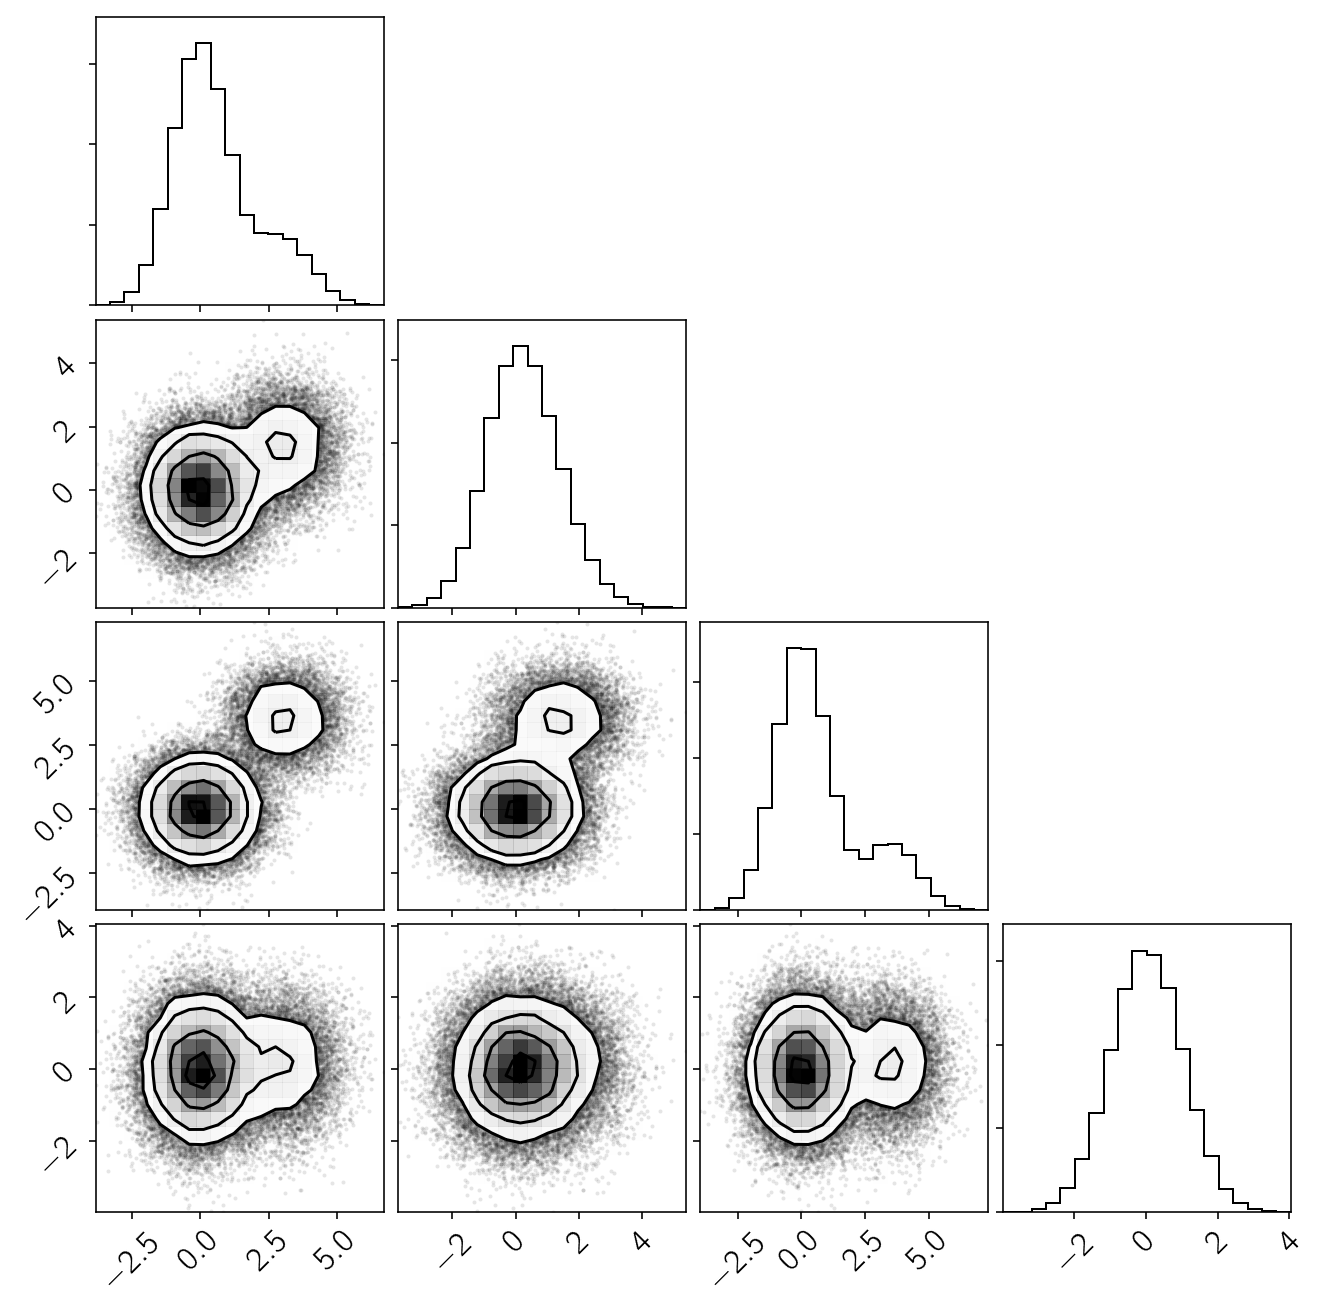

In [17]:
import corner
import numpy as np

ndim, nsamples = 4, 50000
np.random.seed(1234)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
mean = 4*np.random.rand(ndim)
data2 = (mean[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
samples = np.vstack([data1, data2])

figure = corner.corner(samples)

Now let's overplot the empirical mean of the samples and the true mean of the second mode.

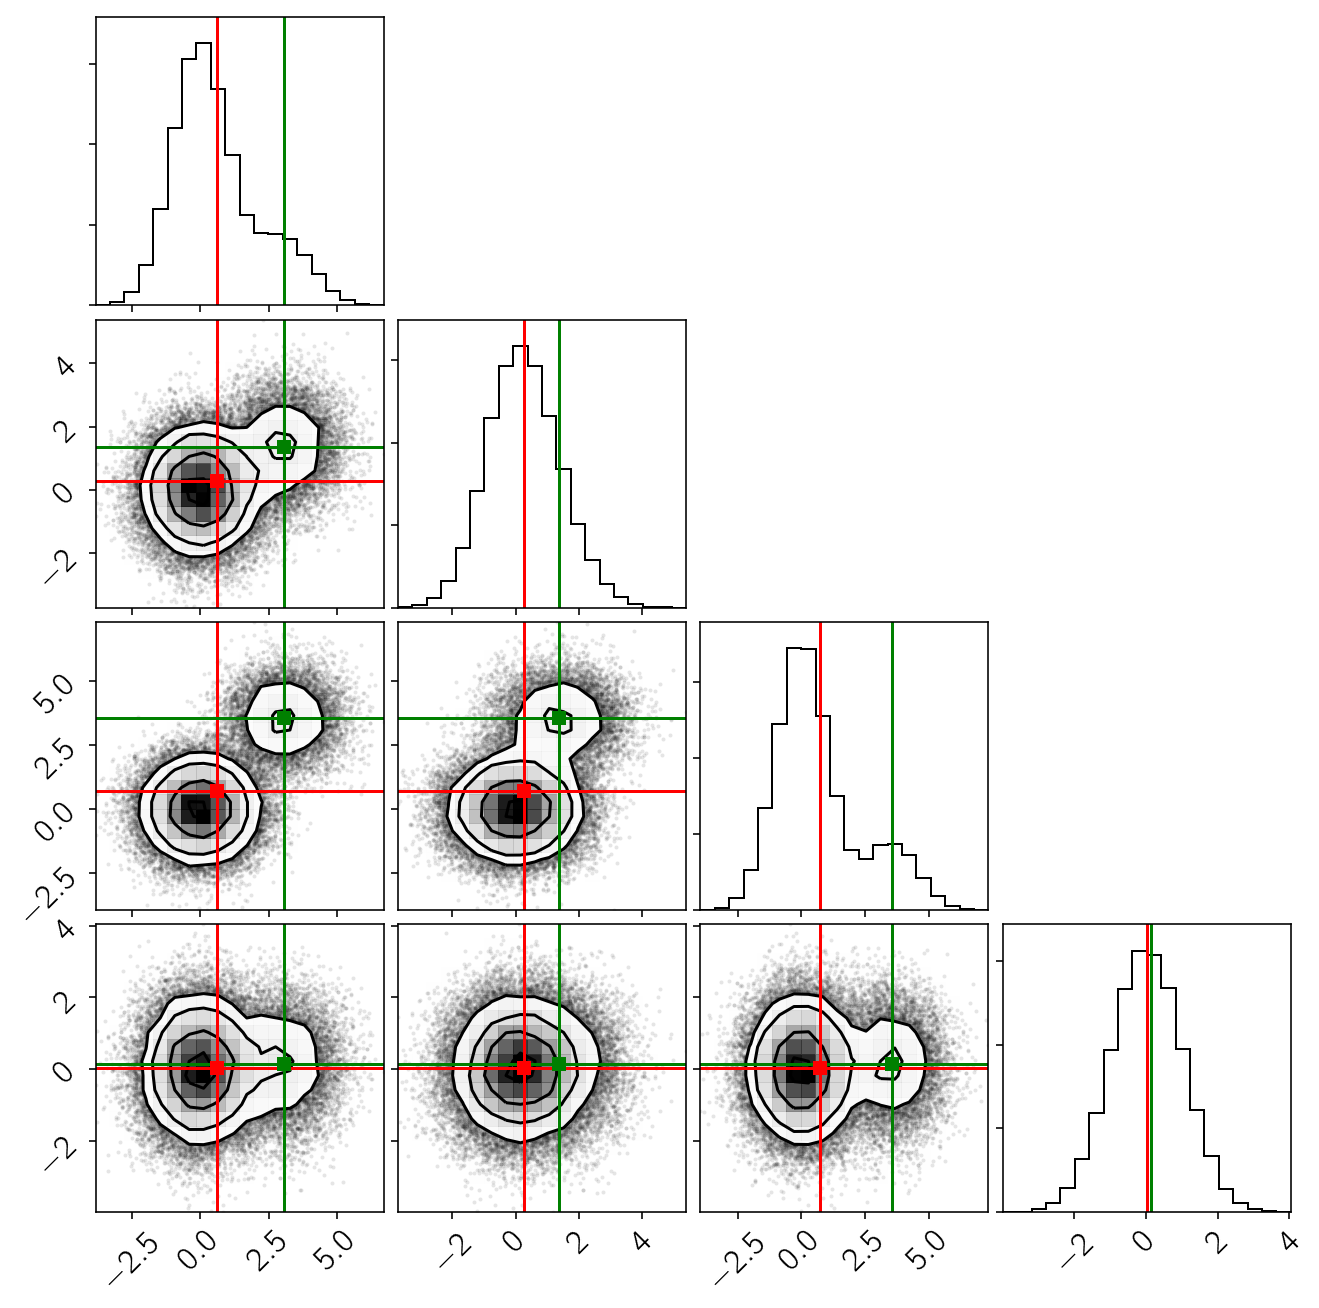

In [21]:
# This is the true mean of the second mode that we used above:
value1 = mean

# This is the empirical mean of the sample:
value2 = np.mean(samples, axis=0)

# Make the base corner plot
figure = corner.corner(samples)

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")
    ax.axvline(value2[i], color="r")
    
# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        ax.axvline(value2[xi], color="r")
        ax.axhline(value1[yi], color="g")
        ax.axhline(value2[yi], color="r")
        ax.plot(value1[xi], value1[yi], "sg")
        ax.plot(value2[xi], value2[yi], "sr")

A similar procedure could be used to add anything to the axes that you can normally do with matplotlib.